In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv("dataset/crop_yield.csv")

In [4]:
data.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [5]:
data.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [6]:
# data.shape
data.info()
# data.dtypes
# data.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [7]:
data.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [8]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [9]:
# Adding new column 'Value' where Value = Yield_tons_per_hectare * 1000
data['Value'] = data['Yield_tons_per_hectare'] * 1000

In [10]:
data.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare', 'Value'],
      dtype='object')

array([[<Axes: title={'center': 'Rainfall_mm'}>,
        <Axes: title={'center': 'Temperature_Celsius'}>],
       [<Axes: title={'center': 'Days_to_Harvest'}>,
        <Axes: title={'center': 'Yield_tons_per_hectare'}>],
       [<Axes: title={'center': 'Value'}>, <Axes: >]], dtype=object)

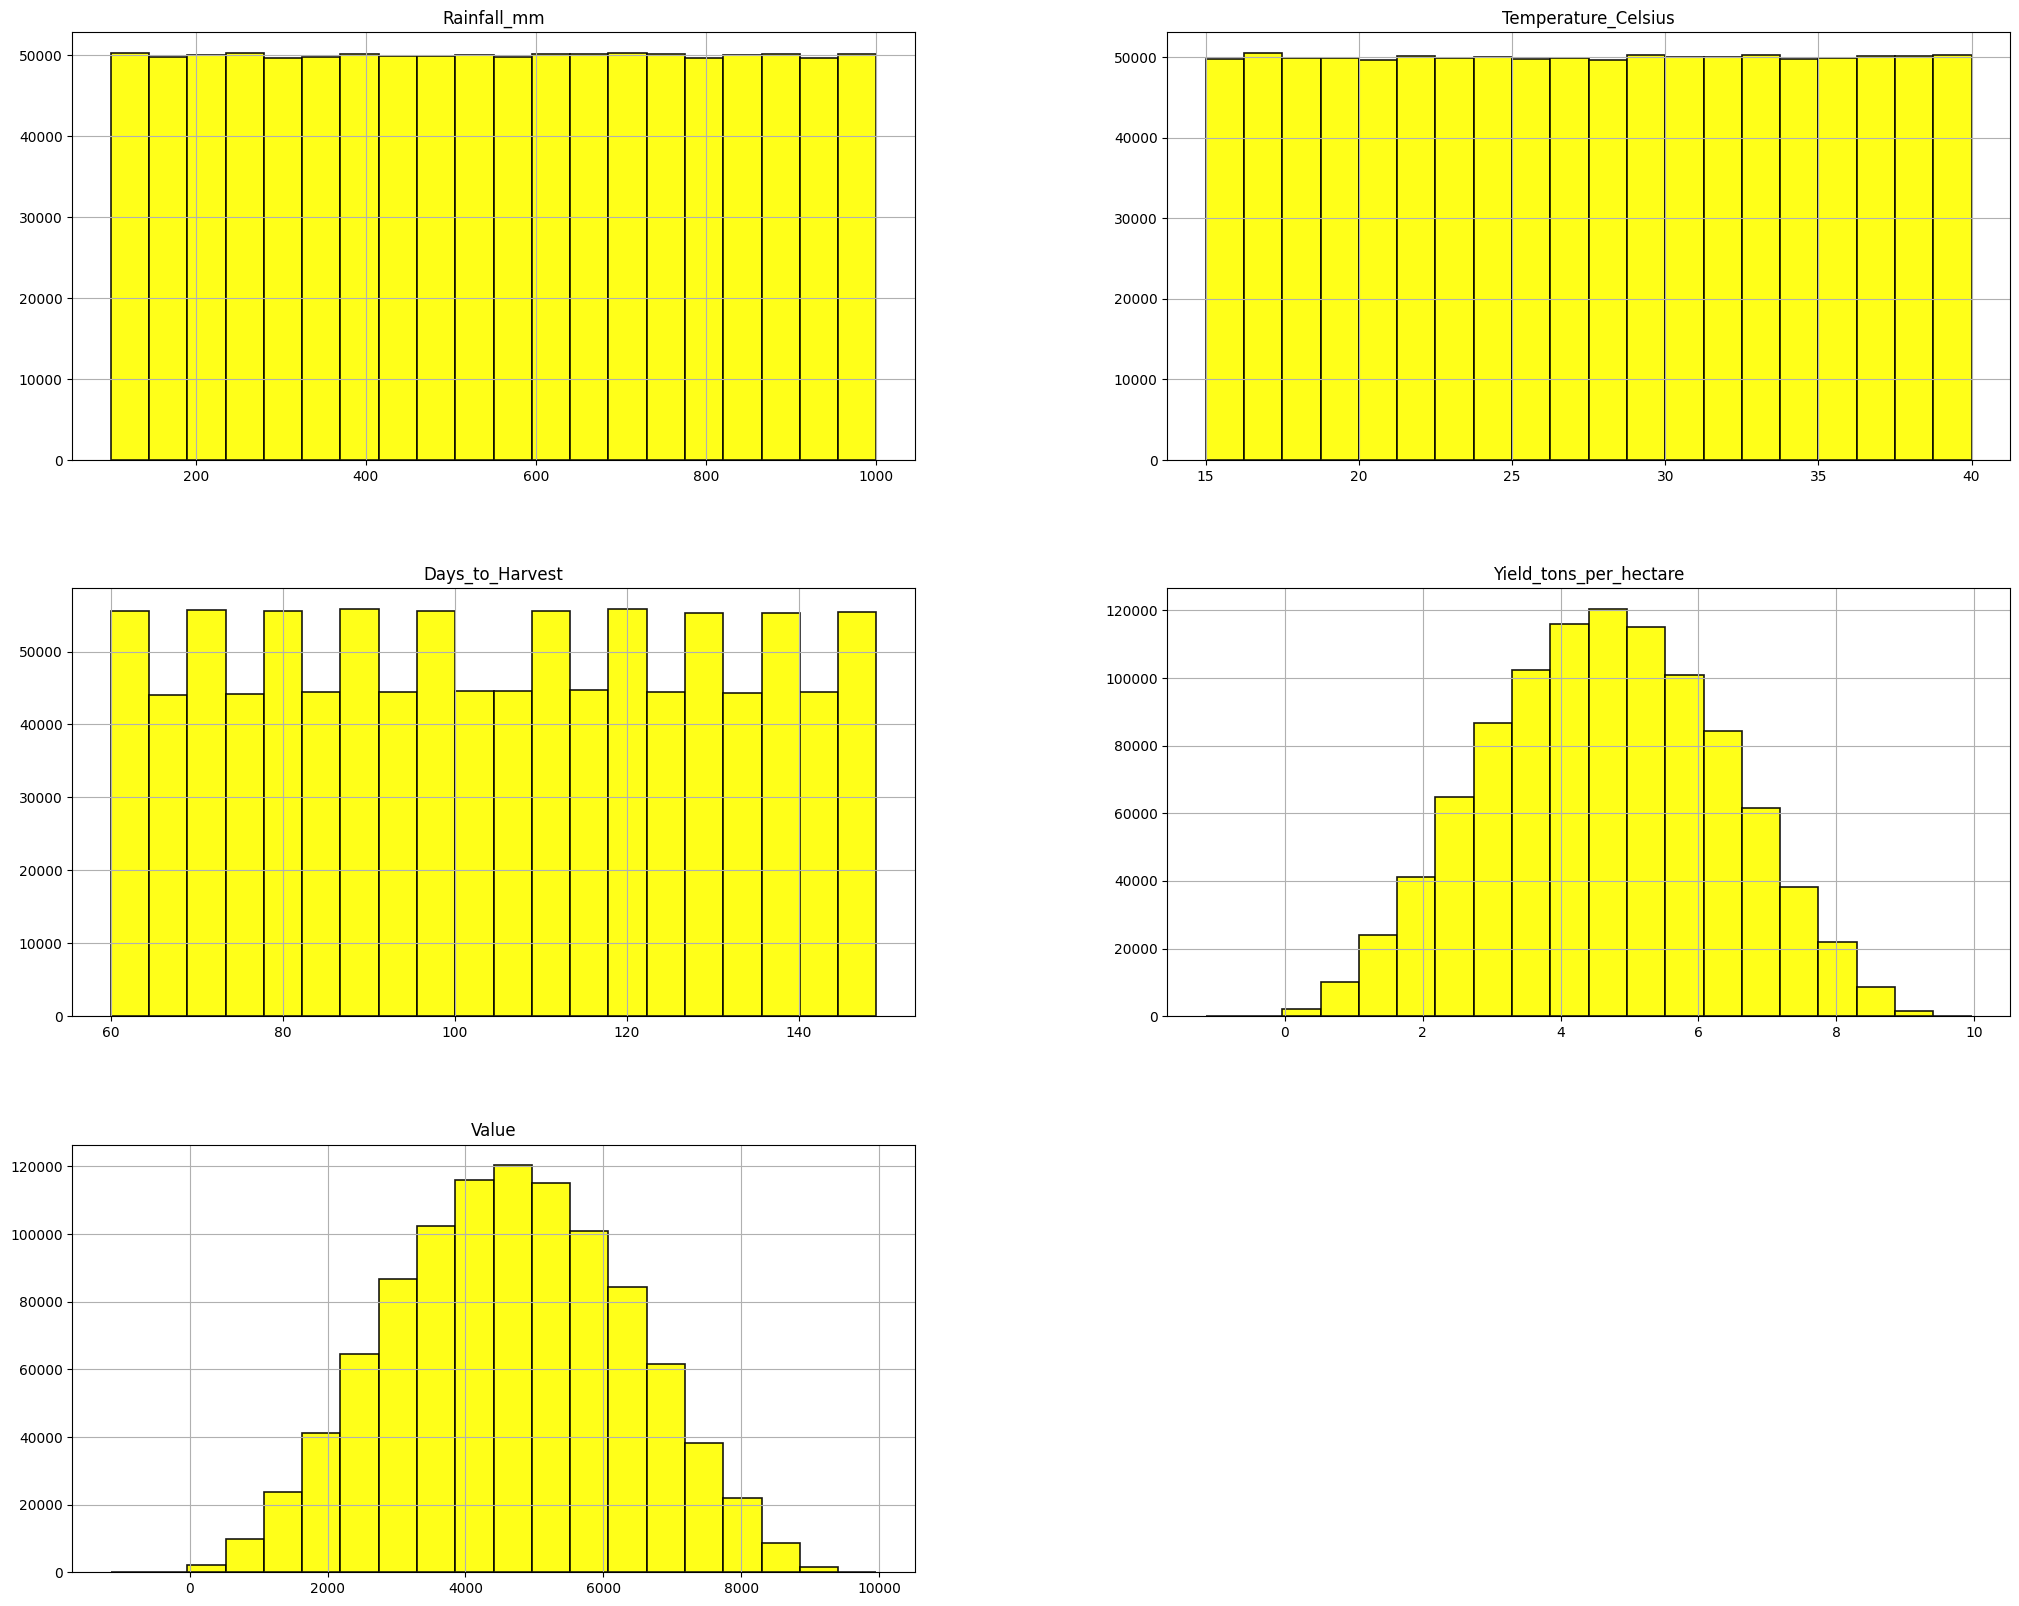

In [11]:
data.hist(bins=20, figsize=(25,20), color='yellow', alpha=0.9, edgecolor='black', linewidth=1.2)

In [12]:
df =data

1. HOW DOES SOIL TYPE AFFECT CROP YIELD?

<Axes: xlabel='Soil_Type', ylabel='Yield_tons_per_hectare'>

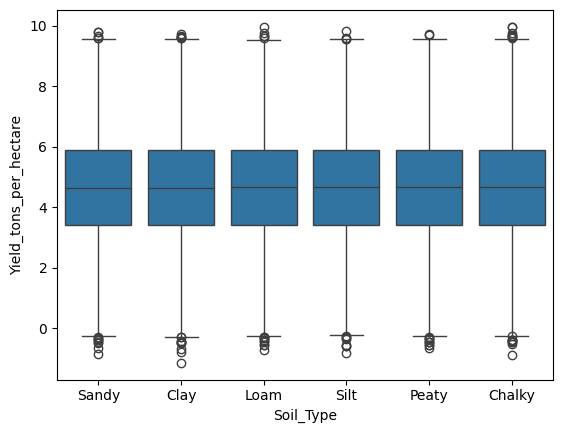

In [13]:
sns.boxplot(x = "Soil_Type", y = "Yield_tons_per_hectare", data = df)

In [14]:
model = ols(formula = "Yield_tons_per_hectare ~ C(Soil_Type)", data = df).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Yield_tons_per_hectare   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                    0.4604
Date:                    Fri, 18 Oct 2024   Prob (F-statistic):              0.806
Time:                            20:46:06   Log-Likelihood:            -1.9475e+06
No. Observations:                 1000000   AIC:                         3.895e+06
Df Residuals:                      999994   BIC:                         3.895e+06
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.6529      0.004   1120.007      0.000       4.645       4.661
C(Soil_Type)[T.Clay]     -0.0080      0.006     -1.361      0.173      -0.020       0.004
C(Soil_Type)[T.Loam]     -0.0018      0.006     -0.313      0.754      -0.013       0.010
C(Soil_Type)[T.Peaty]    -0.0018      0.006     -0.311      0.755      -0.013       0.010
C(Soil_Type)[T.Sandy]    -0.0044      0.006     -0.747      0.455      -0.016       0.007
C(Soil_Type)[T.Silt]     -0.0045      0.006     -0.763      0.446      -0.016       0.007
==============================================================================
Omnibus:                    21385.249   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11265.927
Skew:                          -0.001   Prob(JB):                         0.00
Kurtosis:                       2.480   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
sm.stats.anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(Soil_Type),6.625494e+00,5.0,0.460365,0.805999
Residual,2.878349e+06,999994.0,NaN,NaN


2. WHAT IS THE RELATIONSHIP BETWEEN RAINFALL AND CROP YIELD?
A LINEAR REGRESSION WILL BE RELEVANT TO ANSWER THIS QUESTION

In [17]:
ols_data = df[["Rainfall_mm", "Yield_tons_per_hectare"]]

In [18]:
ols_formula = "Yield_tons_per_hectare ~ Rainfall_mm"

In [19]:
OLS = ols(formula = ols_formula, data = ols_data)
df_model = OLS.fit()

In [20]:
df_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Yield_tons_per_hectare   R-squared:                       0.585
Model:                                OLS   Adj. R-squared:                  0.585
Method:                     Least Squares   F-statistic:                 1.408e+06
Date:                    Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                            20:46:07   Log-Likelihood:            -1.5082e+06
No. Observations:                 1000000   AIC:                         3.016e+06
Df Residuals:                      999998   BIC:                         3.017e+06
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9039      0.003    743.825      0.000       1.899       1.909
Rainfall_mm     0.0050   4.21e-06   1186.402      0.000       0.005       0.005
==============================================================================
Omnibus:                    37460.177   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16485.412
Skew:                           0.001   Prob(JB):                         0.00
Kurtosis:                       2.371   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.

In [21]:
X = ols_data["Rainfall_mm"]

fitted_values = df_model.predict(X)

In [22]:
residuals = df_model.resid

<Axes: xlabel='Rainfall_mm', ylabel='Yield_tons_per_hectare'>

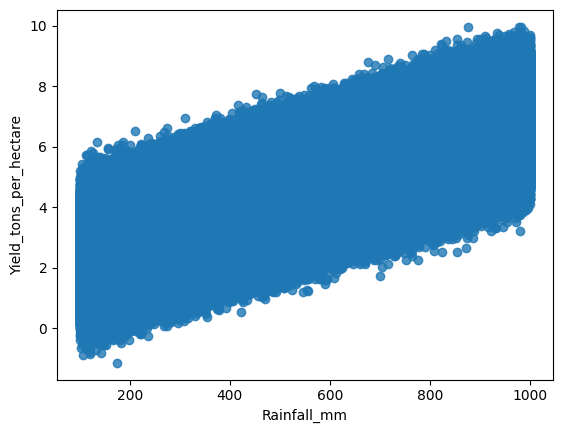

In [23]:
sns.regplot(x = "Rainfall_mm", y = "Yield_tons_per_hectare", data = ols_data)

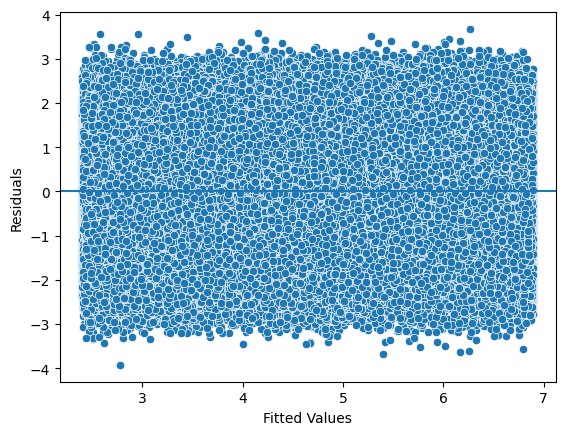

In [24]:
fig = sns.scatterplot(x = fitted_values, y = residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

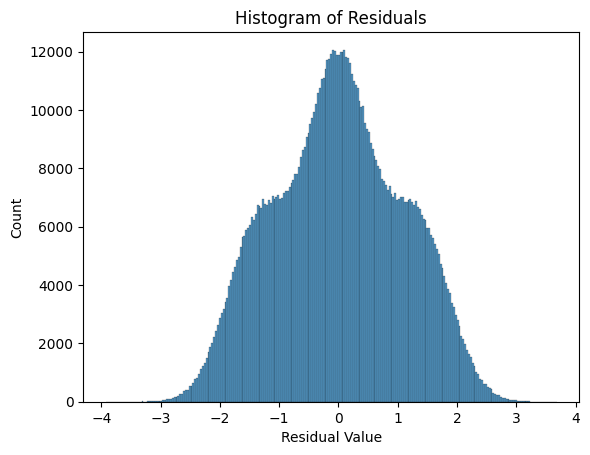

In [25]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

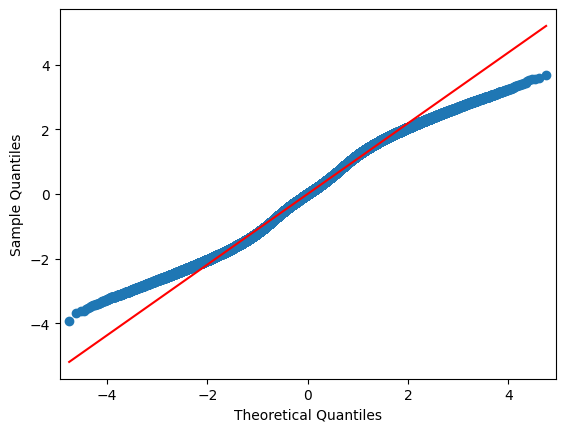

In [26]:
fig = sm.qqplot(df_model.resid, line = 's')
plt.show()

3. HOW DOES TEMPERATURE INFLUENCE CROP YIELD?
A MULTIPLE LINEAR REGRESSION MODEL IS RELEVANT HERE.

In [27]:
x_df = df[["Temperature_Celsius", "Fertilizer_Used", "Irrigation_Used"]]
y_df = df[["Yield_tons_per_hectare"]]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.3, random_state = 42)

In [29]:
#We need to set up a multiple regression formula
# ols_mr_formula = "Yield_tons_per_hectare ~ Temperature_Celsius + C(Fertilizer_Used) + C(Irrigation_Used)"

In [30]:
# ols_mr_data = pd.concat([x_train, y_train], axis = 1)

In [31]:
# model = OLS_mr.fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Yield_tons_per_hectare   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                    0.4604
Date:                    Fri, 18 Oct 2024   Prob (F-statistic):              0.806
Time:                            20:47:19   Log-Likelihood:            -1.9475e+06
No. Observations:                 1000000   AIC:                         3.895e+06
Df Residuals:                      999994   BIC:                         3.895e+06
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.6529      0.004   1120.007      0.000       4.645       4.661
C(Soil_Type)[T.Clay]     -0.0080      0.006     -1.361      0.173      -0.020       0.004
C(Soil_Type)[T.Loam]     -0.0018      0.006     -0.313      0.754      -0.013       0.010
C(Soil_Type)[T.Peaty]    -0.0018      0.006     -0.311      0.755      -0.013       0.010
C(Soil_Type)[T.Sandy]    -0.0044      0.006     -0.747      0.455      -0.016       0.007
C(Soil_Type)[T.Silt]     -0.0045      0.006     -0.763      0.446      -0.016       0.007
==============================================================================
Omnibus:                    21385.249   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11265.927
Skew:                          -0.001   Prob(JB):                         0.00
Kurtosis:                       2.480   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

TEMPERATURE HAS A POSITIVE BUT SMALLER EFFECT ON CROP YIELD COMPARED TO THE OTHER VARIABLES SUCH AS FERTILIZER AND IRRIGATION, THEREFORE MAXIMIZING CROP YIELD APPEARS TO RELY MORE ON FERTILIZER AND IRRIGATION USES

4. WHAT WEATHER CONDITIONS CORRELATE WITH HIGHER CROP YIELDS?

In [33]:
df['Yield_Category']= (df['Yield_tons_per_hectare'] > df['Yield_tons_per_hectare'].median()).astype(int)

In [34]:
contingency_table = pd.crosstab(df['Weather_Condition'], df['Yield_Category'])

In [35]:
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

In [36]:
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 0.8808915582323273
P-value: 0.6437493870782094
Degrees of Freedom: 2
Expected Frequencies Table:
[[166324.5 166324.5]
 [166780.5 166780.5]
 [166895.  166895. ]]


There is no significant association between weather conditions and crop yield.

5. HOW DO THE NUMBER OF DAYS TO HARVEST AFFECT CROP YIELD?

In [37]:
correlation, p_value = pearsonr(df['Days_to_Harvest'], df['Yield_tons_per_hectare'])
print(f'Correlation: {correlation}, P-value: {p_value}')

Correlation: -0.002590633373218644, P-value: 0.009579918297772572


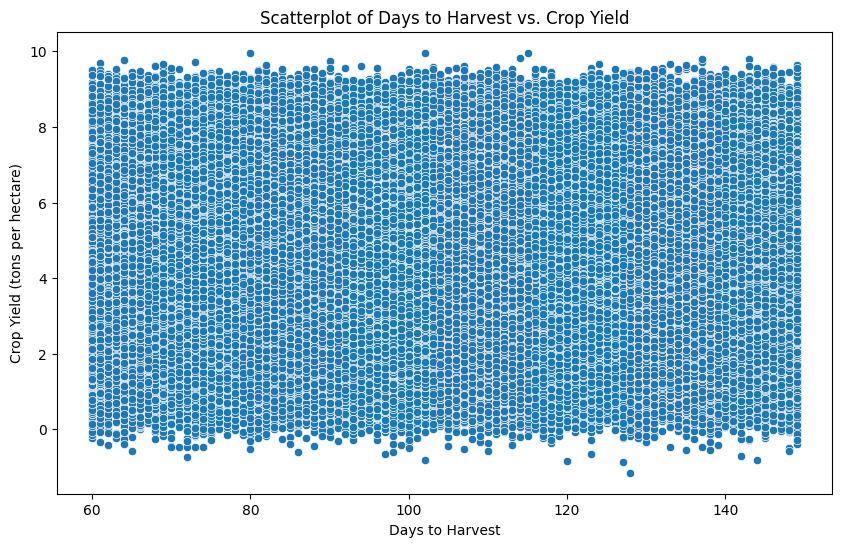

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days_to_Harvest', y='Yield_tons_per_hectare', data=df)
plt.title('Scatterplot of Days to Harvest vs. Crop Yield')
plt.xlabel('Days to Harvest')
plt.ylabel('Crop Yield (tons per hectare)')
plt.show()

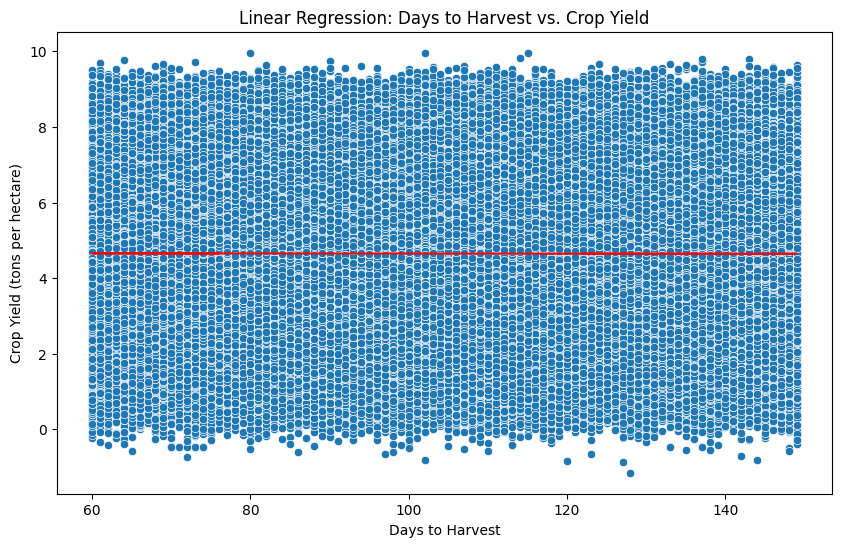

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.711
Date:                Fri, 18 Oct 2024   Prob (F-statistic):            0.00958
Time:                        20:47:25   Log-Likelihood:            -1.9475e+06
No. Observations:             1000000   AIC:                         3.895e+06
Df Residuals:                  999998   BIC:                         3.895e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6672      0.007    663.105      0.0

In [39]:
X = df['Days_to_Harvest'].values.reshape(-1, 1)  # Independent variable (Days to Harvest)
y = df['Yield_tons_per_hectare'].values  # Dependent variable (Crop Yield)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)
# Predict values and visualize the regression line
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days_to_Harvest', y='Yield_tons_per_hectare', data=df)
plt.plot(df['Days_to_Harvest'], y_pred, color='red')  # Regression line
plt.title('Linear Regression: Days to Harvest vs. Crop Yield')
plt.xlabel('Days to Harvest')
plt.ylabel('Crop Yield (tons per hectare)')
plt.show()
# Linear Regression Summary using statsmodels (more detailed)
X_with_const = sm.add_constant(X)  # Add a constant for intercept
model_sm = sm.OLS(y, X_with_const)
result = model_sm.fit()
print(result.summary())

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

6. HOW DOES IRRIGATION AFFECT THE CROP YIELD IN DIFFERENT WEATHER CONDITIONS?

In [40]:
x_df = df[["Irrigation_Used", "Weather_Condition"]]
y_df = df[["Yield_tons_per_hectare"]]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.3, random_state = 42)

In [42]:
ols_mr_formula = "Yield_tons_per_hectare ~ C(Irrigation_Used)  + C(Weather_Condition)"

In [43]:
ols_mr_data = pd.concat([x_train, y_train], axis = 1)

In [44]:
OLS_mr = ols(formula = ols_mr_formula, data = ols_mr_data)

In [45]:
model = OLS_mr.fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Yield_tons_per_hectare   R-squared:                       0.125
Model:                                OLS   Adj. R-squared:                  0.125
Method:                     Least Squares   F-statistic:                 3.338e+04
Date:                    Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                            20:47:27   Log-Likelihood:            -1.3161e+06
No. Observations:                  700000   AIC:                         2.632e+06
Df Residuals:                      699996   BIC:                         2.632e+06
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         4.0462      0.004   1066.477      0.000       4.039       4.054
C(Irrigation_Used)[T.True]        1.1998      0.004    316.461      0.000       1.192       1.207
C(Weather_Condition)[T.Rainy]     0.0029      0.005      0.622      0.534      -0.006       0.012
C(Weather_Condition)[T.Sunny]     0.0053      0.005      1.135      0.256      -0.004       0.014
==============================================================================
Omnibus:                    27212.592   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11817.817
Skew:                           0.002   Prob(JB):                         0.00
Kurtosis:                       2.363   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

////////////////////////////////////////////////////////////
// LINEAR REGRESSION
//////////////////////////////////////////////////////////////

In [51]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load dataset
data = pd.read_csv('dataset/crop_yield.csv')

# Data Preprocessing

# Step 1: Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()

# Step 2: Remove any leading/trailing spaces from data entries
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Step 3: Drop rows with missing values (if any)
data.dropna(inplace=True)

# Step 4: Converting categorical features to numerical using Label Encoding
label_encoders = {}
for column in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Step 5: Defining features (X) and target (y)
X = data.drop(['Yield_tons_per_hectare'], axis=1)
y = data['Yield_tons_per_hectare']

# Step 6: Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=10, random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Step 8: Training and evaluating models
for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")

# Optional: Save the models if needed
# import pickle
# with open('model.pkl', 'wb') as f:
#     pickle.dump(models['Random Forest'], f)


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_14376\3883438429.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Linear Regression: MSE = 0.2508, R² = 0.9130
Decision Tree: MSE = 0.5324, R² = 0.8153
Random Forest: MSE = 0.2908, R² = 0.8991
Gradient Boosting: MSE = 0.7710, R² = 0.7326


In [ ]:
!pip install xgboost lightgbm catboost


In [57]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from tqdm import tqdm  # Progress bar

# Load dataset
data = pd.read_csv('dataset/crop_yield.csv')

# Data Preprocessing

# Step 1: Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()

# Step 2: Remove any leading/trailing spaces from data entries
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Step 3: Drop rows with missing values (if any)
data.dropna(inplace=True)

# Step 4: Converting categorical features to numerical using Label Encoding
label_encoders = {}
for column in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Step 5: Defining features (X) and target (y)
X = data.drop(['Yield_tons_per_hectare'], axis=1)
y = data['Yield_tons_per_hectare']

# Step 6: Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet Regression': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Huber Regressor': HuberRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Bagging Regressor': BaggingRegressor(n_estimators=50, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, silent=True),
    'Neural Network (MLP Regressor)': MLPRegressor(hidden_layer_sizes=(100,100), max_iter=500, random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Step 8: Training and evaluating models with progress bar
for name, model in tqdm(models.items(), desc="Training Models", total=len(models)):
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{name}: MSE = {mse:.4f}, R² = {r2:.4f}")

# Optional: Save the models if needed
# import pickle
# with open('model.pkl', 'wb') as f:
#     pickle.dump(models['Random Forest'], f)


C:\Users\Himanshu\AppData\Local\Temp\ipykernel_14376\3417129849.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
Training Models:  12%|█▏        | 2/17 [00:00<00:02,  6.30it/s]

Linear Regression: MSE = 0.2508, R² = 0.9130
Ridge Regression: MSE = 0.2508, R² = 0.9130


Training Models:  18%|█▊        | 3/17 [00:00<00:02,  4.85it/s]

Lasso Regression: MSE = 0.3324, R² = 0.8847


Training Models:  24%|██▎       | 4/17 [00:00<00:02,  4.37it/s]

ElasticNet Regression: MSE = 0.3292, R² = 0.8858


c:\Users\Himanshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
Training Models:  29%|██▉       | 5/17 [00:11<00:48,  4.04s/it]

Huber Regressor: MSE = 0.2510, R² = 0.9129


Training Models:  35%|███▌      | 6/17 [00:30<01:38,  8.99s/it]

Decision Tree: MSE = 0.5324, R² = 0.8153


Training Models:  35%|███▌      | 6/17 [00:44<01:21,  7.45s/it]


KeyboardInterrupt: 